In [1]:
# Display plots inline
%matplotlib inline

# Autoreload all package before excecuting a call
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import tailor
from tailor.clustering import *
from tailor.visualization import *

In [3]:
data = tailor.load_data()

In [4]:
feats = ['color', 'brand', 'Abteilung', 'WHG', 'WUG', 'season', 'month']
ranking.rank_features(data, distance.absolute, feats, 'article_count')

Abteilung    44.763694
month        12.649368
brand        10.133785
WHG           9.963491
season        7.670043
WUG           5.070465
color         2.246568
dtype: float64

In [5]:
feat = 'brand'
target_value = 'revenue'

In [6]:
df = build_clusters(data, feat, distance.absolute, target_value)
cluster_characteristics(df, feat)

cluster
0            Fimmilena, Aumenahenae, Mani, Aviaitinehae
1     Gersimi, Loki, Turstuahenae, Börr, Travalaha, ...
13                                                Gautr
15    Heimdall, Mercurius Hranno, Wanen, Siofna, Höd...
30    Gna, Sigyn, Gebrinius, Hermodr, Þorgerðr Holga...
31                                Hercules Deusoniensis
60                                             Hurstrga
61                           Vacallinehae, Grusduahenae
64                                               Gausus
69                                              Hariasa
73                                         Axsinginehae
Name: brand, dtype: object

In [7]:
from sklearn.decomposition import PCA
# pca = PCA(n_components=2)

In [8]:
X = df.pivot(index='article_id', columns='time_on_sale', values='revenue').reset_index()
X.index = pd.Int64Index(X.article_id)
X = X.drop('article_id', axis=1)
X.columns.name = ''

In [9]:
# X_r = pca.fit(X).transform(X)
# print('explained variance ratio (first two components): %s'
#      % str(pca.explained_variance_ratio_))

In [10]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, perplexity=10)
X_r = model.fit_transform(X)


In [11]:
cluster_labels = df.loc[:,['article_id', 'cluster']].groupby('article_id').first().reset_index()
F = pd.DataFrame(X_r)
F['cluster'] = cluster_labels.cluster

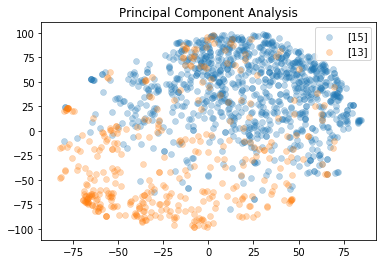

In [14]:
import matplotlib.pyplot as plt
plt.figure()
#colors = ['navy', 'turquoise', 'darkorange']
lw = 0.5

for i in [15,13]:
    plt.scatter(F.loc[F.cluster == i, 0], F.loc[F.cluster == i, 1], alpha=.3, lw=lw,
                label=F.loc[F.cluster == i, 'cluster'].unique())
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Principal Component Analysis')
plt.show()